Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Analysis

In [15]:
from google.colab import files
upload_file = files.upload()

Saving bigmart.csv to bigmart.csv


In [16]:
big_mart_data  = pd.read_csv("bigmart.csv")

In [17]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
#Number of data points and number of features
big_mart_data.shape

(8523, 12)

In [20]:
#Getting some informations about the dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Feature:


1.  Item_identifier
2. Item_Fat_content
3. Item_type
4. Outlet_Identifier
5. Outlet_Size
6. Outlet_location_type
7. Outlet_Type







In [22]:
#Checking for missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Mean--> average value

Mode -- > Most repeated value

In [24]:
# Mean value of "Item Weight" column
big_mart_data['Item_Weight'].mean()


np.float64(12.857645184135976)

In [25]:
#Filling the missing values in 'Item_weight' column with "Mean" Value
big_mart_data["Item_Weight"].fillna(big_mart_data['Item_Weight'].mean(),inplace = True)

/tmp/ipython-input-1146479424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mart_data["Item_Weight"].fillna(big_mart_data['Item_Weight'].mean(),inplace = True)


In [27]:
big_mart_data["Outlet_Size"].mode()

,Outlet_Size
0,Medium


Replacing the missing value in Outlet_Size with mode

In [33]:
mode_of_outlet_size = big_mart_data.pivot_table(values = 'Outlet_Size',columns = 'Outlet_Type',aggfunc = (lambda x:x.mode()[0]) )

In [34]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [36]:
missing_values = big_mart_data["Outlet_Size"].isnull()

In [37]:
missing_values

,Outlet_Size
0,False
1,False
2,False
3,True
4,False
...,...
8518,False
8519,True
8520,False
8521,False


In [61]:
big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size.loc[mode_of_outlet_size.index[0], x])

/tmp/ipython-input-2354115639.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x][0])


In [39]:
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


Data Analysis

In [41]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [42]:
sns.set()

/tmp/ipython-input-1845187749.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data["Item_Weight"])


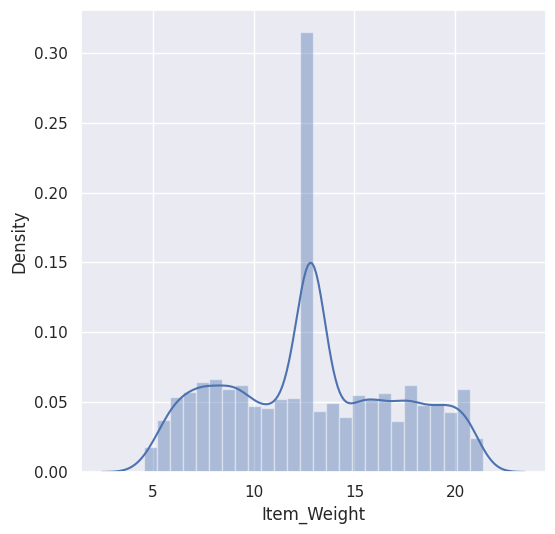

In [45]:
#Item_weight distribution
plt.figure(figsize =(6,6))
sns.distplot(big_mart_data["Item_Weight"])
plt.show()

/tmp/ipython-input-637988641.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data["Item_Visibility"])


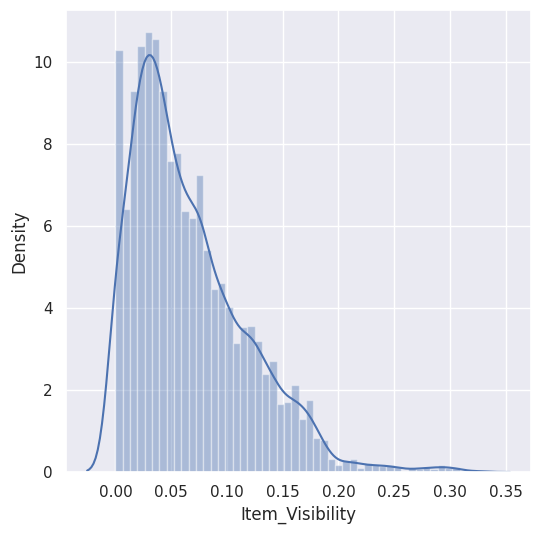

In [46]:
#Item_Visiblity distribution
plt.figure(figsize =(6,6))
sns.distplot(big_mart_data["Item_Visibility"])
plt.show()

/tmp/ipython-input-3657086905.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data["Item_MRP"])


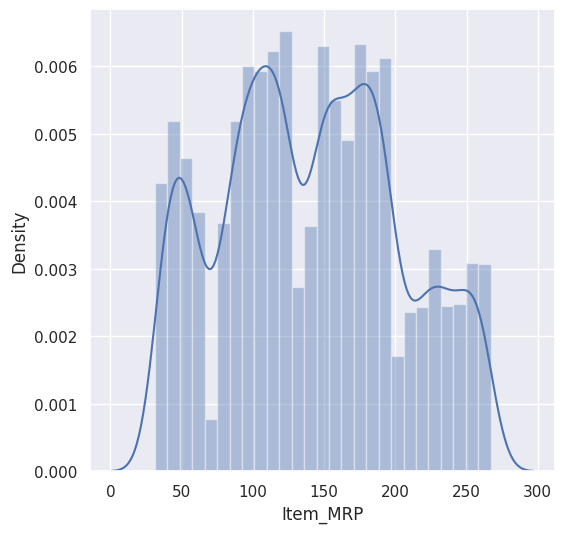

In [47]:
#Item_MRP distribution
plt.figure(figsize =(6,6))
sns.distplot(big_mart_data["Item_MRP"])
plt.show()

/tmp/ipython-input-2681453992.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data["Item_Outlet_Sales"])


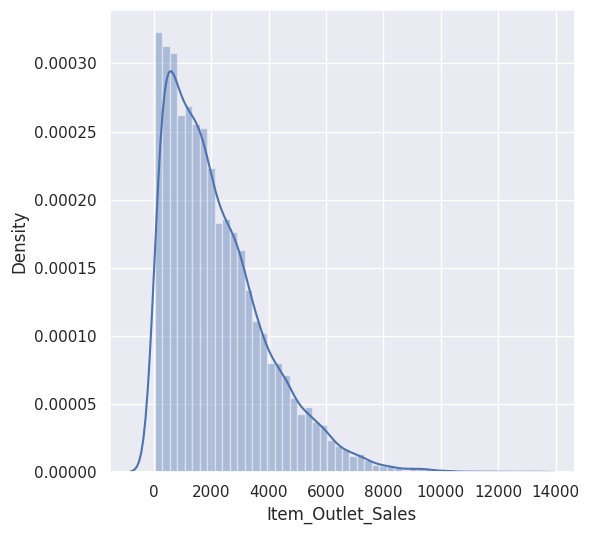

In [48]:
#Item_Outlet_Sales distribution
plt.figure(figsize =(6,6))
sns.distplot(big_mart_data["Item_Outlet_Sales"])
plt.show()

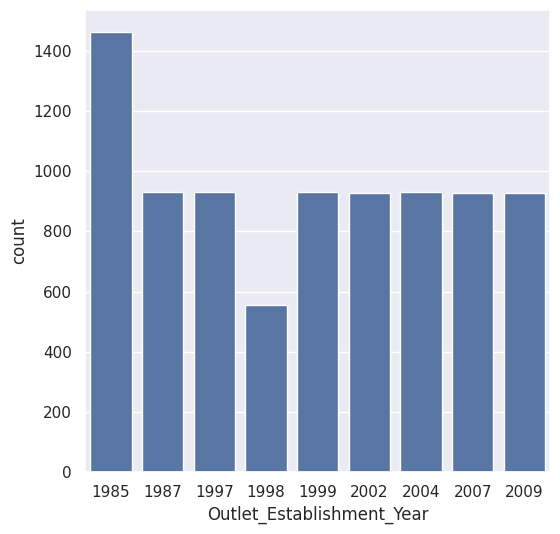

In [50]:
#Outlet_Establishment_Year column
plt.figure(figsize = (6,6))
sns.countplot(x='Outlet_Establishment_Year',data =big_mart_data )
plt.show()

Categorical feature

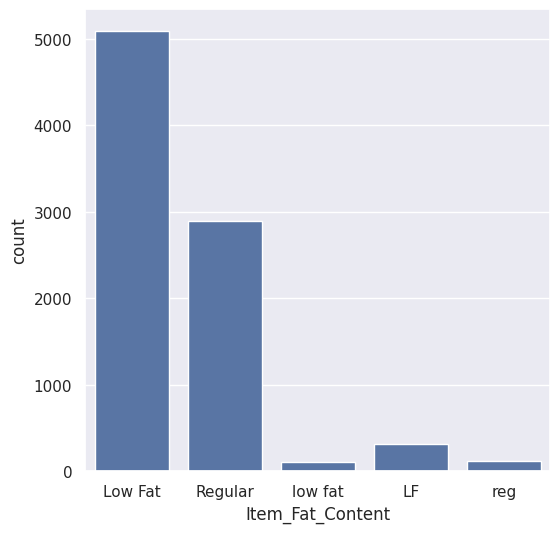

In [51]:
#Item_Fat_Content column
plt.figure(figsize = (6,6))
sns.countplot(x='Item_Fat_Content',data =big_mart_data )
plt.show()

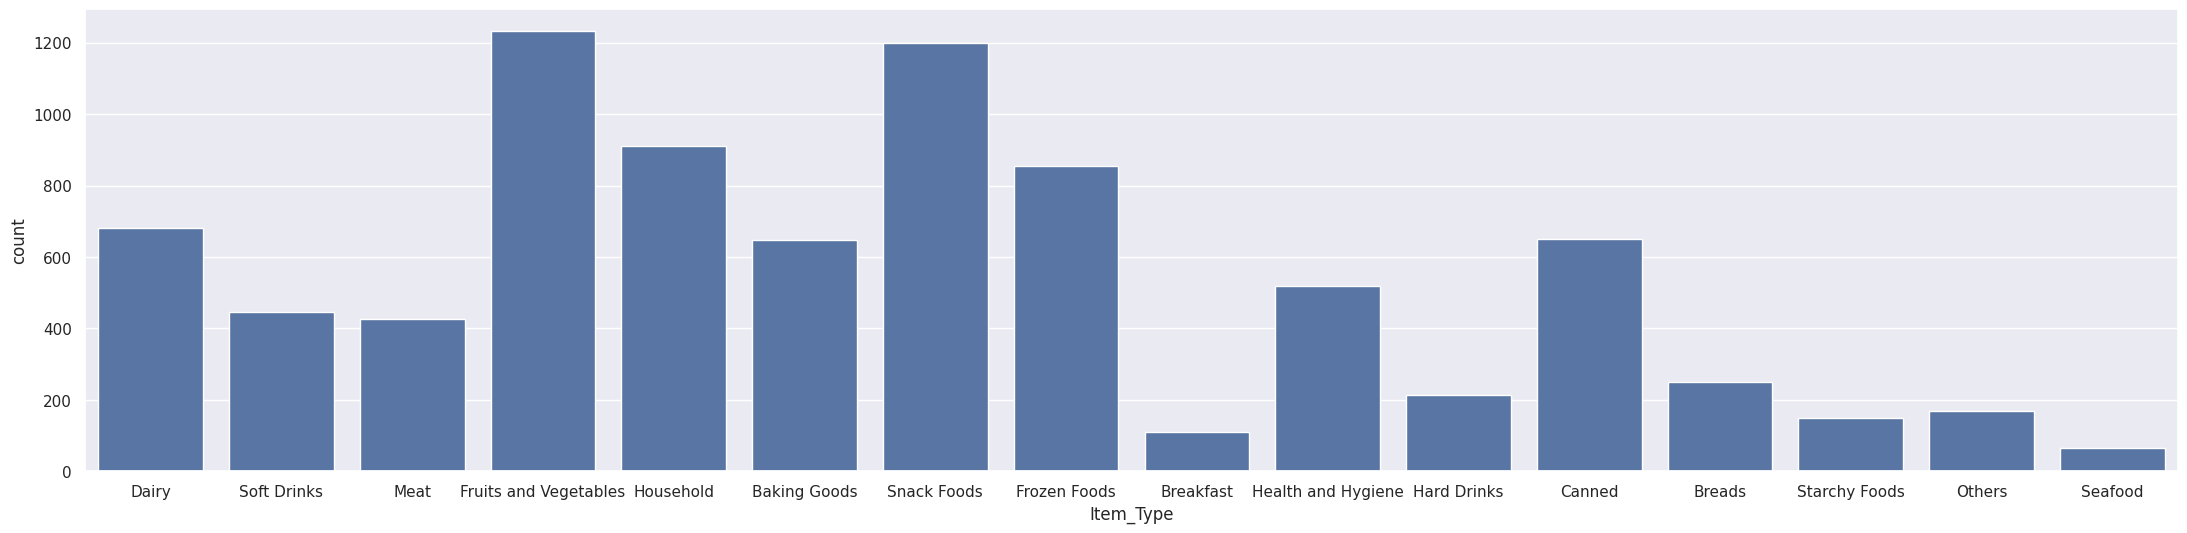

In [54]:
#Item_Type column
plt.figure(figsize = (27,6))
sns.countplot(x='Item_Type',data =big_mart_data )
plt.show()

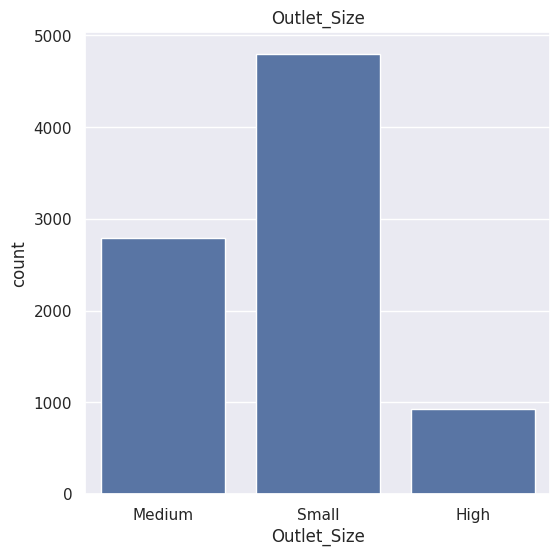

In [64]:
#Outlet_Size column
plt.figure(figsize = (6,6))
sns.countplot(x='Outlet_Size',data =big_mart_data)
plt.title('Outlet_Size')
plt.show()

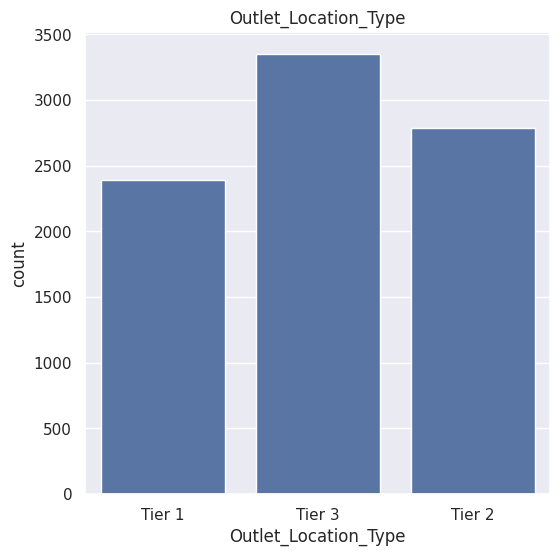

In [65]:
#Outlet_Location_Type column
plt.figure(figsize = (6,6))
sns.countplot(x='Outlet_Location_Type',data =big_mart_data)
plt.title('Outlet_Location_Type')
plt.show()

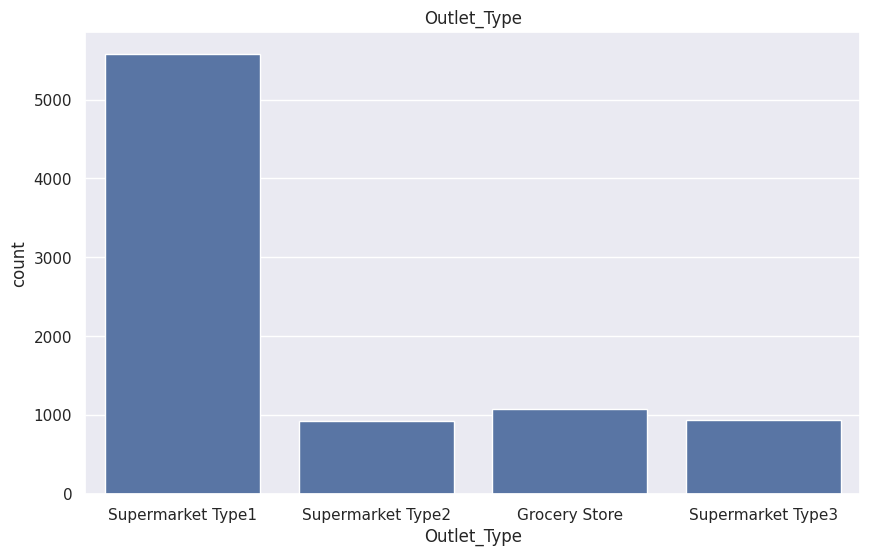

In [67]:
#Outlet_Type column
plt.figure(figsize = (10,6))
sns.countplot(x='Outlet_Type',data =big_mart_data)
plt.title('Outlet_Type')
plt.show()

Data preprocessing

In [68]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [69]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [70]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}},inplace = True)

In [71]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


Label Encoding

In [72]:
encoder = LabelEncoder()

In [73]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])
big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])


In [74]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting **Features** and **Target**

In [76]:
X = big_mart_data.drop(columns = 'Item_Outlet_Sales',axis = 1)

In [77]:
Y = big_mart_data['Item_Outlet_Sales']

In [78]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [79]:
Y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


Splitting the Data into Training and Testing Data

In [80]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state =2)

In [81]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Machine learning Model Training

In [82]:
regressor = XGBRegressor()

In [83]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

In [84]:
#PREDICTION ON TRAINING DATA
training_data_prediction = regressor.predict(X_train)

In [85]:
#R squared Value
r2_train = metrics.r2_score(Y_train,training_data_prediction)

In [86]:
r2_train

0.8762174618111388